In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [45]:
train = pd.read_csv('../data/jigsaw_toxic_comments/train.csv', index_col='id')
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [46]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)

/var/folders/nd/d288v22d3ldcm5z0j18hb1t40000gn/T/ipykernel_25326/871430810.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




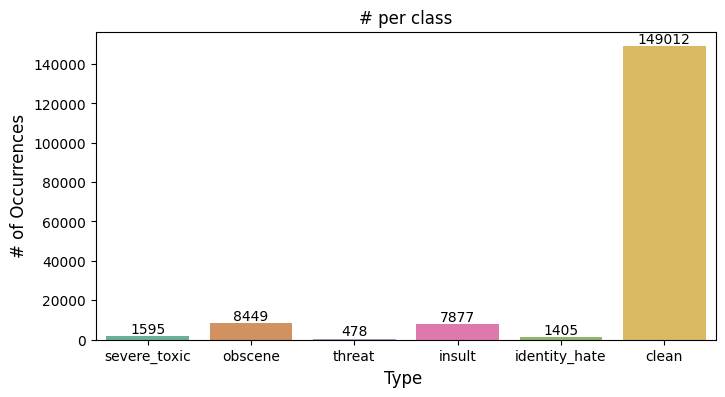

In [47]:
x = train.iloc[:,2:].sum()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.7, palette='Dark2')
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


<Axes: >

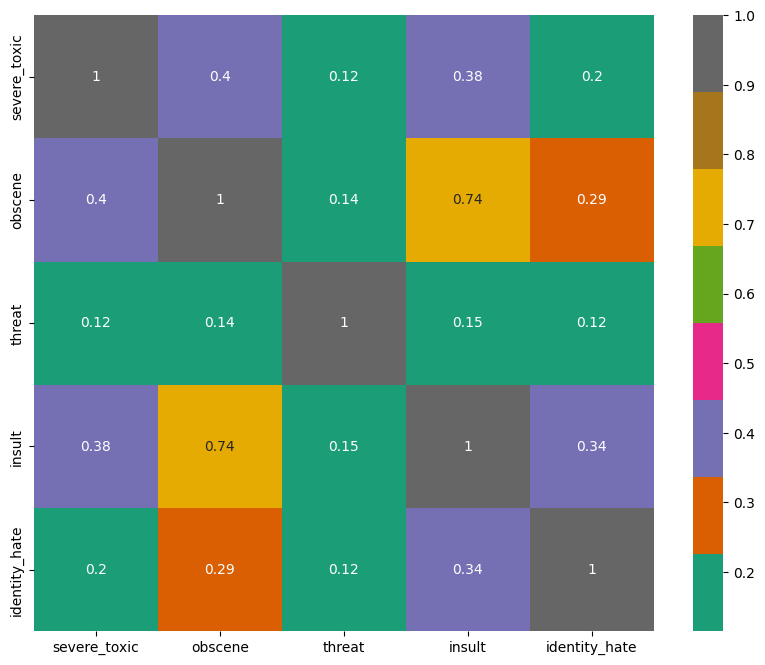

In [48]:
temp_df=train.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            cmap='Dark2')


In [49]:
def concat_label_columns(row):
    multiheads = []
    for col in list(train.columns)[2:]:
        if row[col]:
            multiheads.append(col) 
    if len(multiheads) == 0:
        return "non_toxic"
    else:
        return ":".join(multiheads)

train["concatenated_label"] = train.apply(concat_label_columns, axis=1)
multi_comment_types = list(train["concatenated_label"].unique())

In [53]:
contra_2_cols = ["rgb(150,150,150)", "rgb(55,126,184)"]
rgb_def = ['rgb(228,26,28)', 'rgb(77,175,74)', 'rgb(55,126,184)']

multi_cmnt_type_counts = []
for cmnt_type in multi_comment_types:
    multi_cmnt_type_counts.append(train[train["concatenated_label"] == cmnt_type].shape[0])    
multi_cmnt_type_counts = pd.Series(multi_cmnt_type_counts, index=multi_comment_types)
multi_cmnt_type_counts = multi_cmnt_type_counts.sort_values()
data = []
bar_colors = [contra_2_cols[1]] * len(multi_comment_types)
# set color for "non_toxic" category
bar_colors[list(multi_cmnt_type_counts.index).index("clean")] = contra_2_cols[0]

trace1 = go.Bar(
    x=multi_cmnt_type_counts, 
    y=list(multi_cmnt_type_counts.index), 
    orientation="h",
    marker=dict(
        color=bar_colors
    ),
    name="Comment type"
)
trace2 = go.Scatter(
    x=np.full(len(multi_cmnt_type_counts), train.shape[0]), 
    y=list(multi_cmnt_type_counts.index), 
    mode="lines",
    line = dict(
        color=(rgb_def[0]),
        width = 7,
        dash = 'dashdot',
    ),
    name="training data size"
)
data.append(trace1)
data.append(trace2)
layout=go.Layout(
    title="<b>Distribution of multilabel comment types in the training data</b>",
    xaxis=dict(
        title="Count of comment types in training data",
        type='log',
        autorange=True,
        tickfont=dict(
            color="grey",
        )        
    ),
    yaxis=dict(
        title="Comment type",
        tickfont=dict(
            color="grey",
            size=8            
        )
    ),
    showlegend=False,
    autosize=False,    
    width=900,
    height=900,    
    margin=go.Margin(
        l=200,
        r=100,
        b=25,
        t=100,
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)